<a href="https://colab.research.google.com/github/EronDS/DataScience/blob/main/ModelSelection%26BalancingData/SeleticngModel%26Undersampling/ModelSelection%26UnderSampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sklearn-deap

     |████████████████████████████████| 163kB 10.4MB/s 


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from xgboost import XGBClassifier
from sklearn.model_selection import KFold,cross_validate,cross_val_score,cross_val_predict, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline
from evolutionary_search import EvolutionaryAlgorithmSearchCV
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets-Github/ad_clicker_prediction/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


(array([  0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 7 Text major ticklabel objects>)

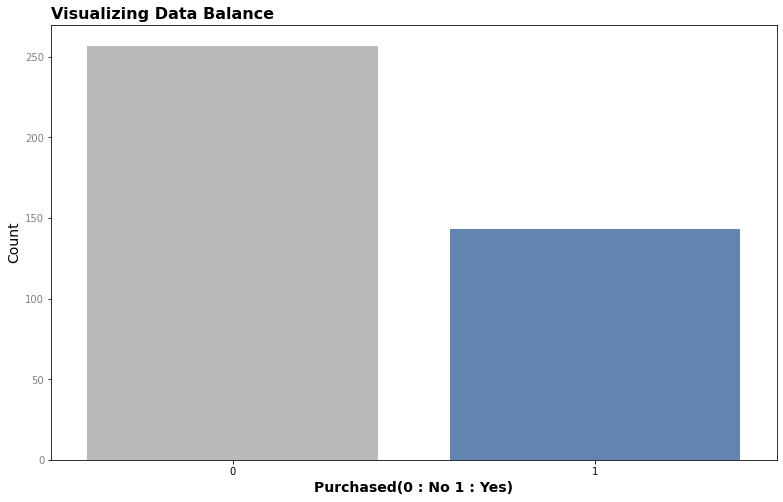

In [5]:
plt.figure(figsize = (13,8))
k = ['#bababa' , '#5683ba' ]
sns.countplot(df['Purchased'] , palette = k)
plt.title('Visualizing Data Balance', fontsize = 16 , weight = 'bold' , loc = 'left')
plt.xlabel('Purchased(0 : No 1 : Yes)' , fontsize = 14 , weight = 'bold')
plt.ylabel('Count', fontsize = 14)
plt.xticks(color = 'black')
plt.yticks(color = 'grey')

### **Balancing Data**

In [6]:
df.Purchased[1]

0

In [7]:
purch = df.loc[(df['Purchased'] == 1)]
NOpurch = df.loc[(df['Purchased'] == 0)]

In [8]:
(len(purch) , len(NOpurch))

(143, 257)

In [9]:
def Disbalance(majority,minority):
  delta = len(majority) - len(minority) 
  percentage = (len(minority) / len(majority)) * 100
  print('Majority Length : {}   Minority Length : {} \n\n Distance : {}'.format(len(majority), len(minority) , delta ,percentage ))

In [10]:
balanced_purch = purch
balanced_Npurch = NOpurch[:143]
balanced_purch

,User ID,Gender,Age,EstimatedSalary,Purchased
7,15694829,Female,32,150000,1
16,15733883,Male,47,25000,1
17,15617482,Male,45,26000,1
18,15704583,Male,46,28000,1
19,15621083,Female,48,29000,1
...,...,...,...,...,...
393,15635893,Male,60,42000,1
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1


In [11]:
balanced_df = pd.concat([balanced_purch, balanced_Npurch])
balanced_df

,User ID,Gender,Age,EstimatedSalary,Purchased
7,15694829,Female,32,150000,1
16,15733883,Male,47,25000,1
17,15617482,Male,45,26000,1
18,15704583,Male,46,28000,1
19,15621083,Female,48,29000,1
...,...,...,...,...,...
162,15599533,Female,37,33000,0
163,15757837,Male,35,38000,0
164,15697574,Female,33,69000,0
165,15578738,Female,18,86000,0


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text major ticklabel objects>)

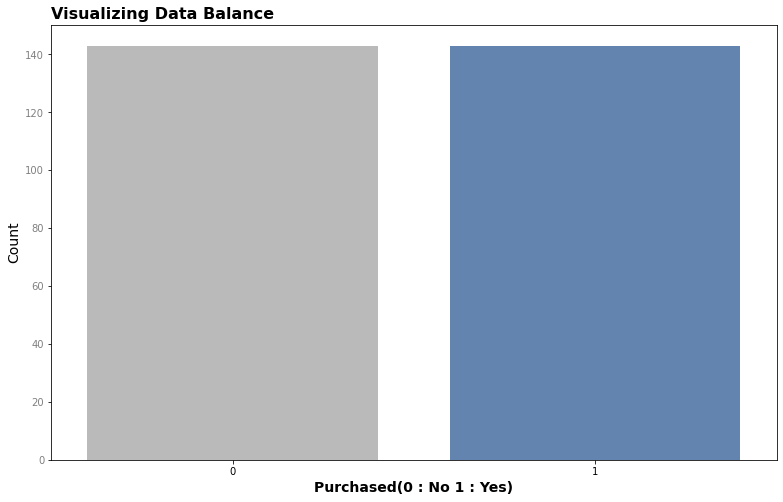

In [12]:
plt.figure(figsize = (13,8))
sns.countplot(balanced_df['Purchased'],
              palette = k)
plt.title('Visualizing Data Balance', fontsize = 16 , weight = 'bold' , loc = 'left')
plt.xlabel('Purchased(0 : No 1 : Yes)' , fontsize = 14 , weight = 'bold')
plt.ylabel('Count', fontsize = 14)
plt.xticks(color = 'black')
plt.yticks(color = 'grey')


### **Selecting Model**

In [13]:
balanced_df

,User ID,Gender,Age,EstimatedSalary,Purchased
7,15694829,Female,32,150000,1
16,15733883,Male,47,25000,1
17,15617482,Male,45,26000,1
18,15704583,Male,46,28000,1
19,15621083,Female,48,29000,1
...,...,...,...,...,...
162,15599533,Female,37,33000,0
163,15757837,Male,35,38000,0
164,15697574,Female,33,69000,0
165,15578738,Female,18,86000,0


In [14]:
balanced_df.drop('User ID' , axis = 1, inplace = True)

In [15]:

le = LabelEncoder()
balanced_df['Gender'] = le.fit_transform(balanced_df['Gender'])

In [16]:
balanced_df

,Gender,Age,EstimatedSalary,Purchased
7,0,32,150000,1
16,1,47,25000,1
17,1,45,26000,1
18,1,46,28000,1
19,0,48,29000,1
...,...,...,...,...
162,0,37,33000,0
163,1,35,38000,0
164,0,33,69000,0
165,0,18,86000,0


In [17]:
y = balanced_df.Purchased
X = balanced_df.drop('Purchased' , axis = 1)

In [18]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = .25)

In [19]:
models = [
          ('LogisticRegression' , LogisticRegression()),
          ('RandomForest' , RandomForestClassifier()),
          ('KNN' , KNeighborsClassifier()),
          ('BernoulliNaiveB' ,BernoulliNB()),
          ('SVM' , SVC()),
          ('GaussianNaiveB', GaussianNB()),
          ('XGB' , XGBClassifier())
]

results = [] 
cvmean = [] 
names = [] 

scoring = ['accuracy' , 'recall_weighted' , 'f1_weighted' , 'roc_auc']
target_names = ['No' , 'Purchased']


for name,model in models:
  kfold = KFold(n_splits = 5 , shuffle = True)
  cv = cross_validate(model,x_train,y_train,cv = kfold,scoring = scoring)
  cv_mean = np.mean(cv['test_accuracy'])
  cvmean.append(cv_mean)
  clf = model.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  print(name)
  print(classification_report(y_test,y_pred, target_names=target_names))
  print('_____________________________________________________________')
  results.append(cv)
  names.append(name)
  

LogisticRegression
              precision    recall  f1-score   support

          No       0.00      0.00      0.00        36
   Purchased       0.50      1.00      0.67        36

    accuracy                           0.50        72
   macro avg       0.25      0.50      0.33        72
weighted avg       0.25      0.50      0.33        72

_____________________________________________________________
RandomForest
              precision    recall  f1-score   support

          No       0.90      0.97      0.93        36
   Purchased       0.97      0.89      0.93        36

    accuracy                           0.93        72
   macro avg       0.93      0.93      0.93        72
weighted avg       0.93      0.93      0.93        72

_____________________________________________________________
KNN
              precision    recall  f1-score   support

          No       0.73      0.92      0.81        36
   Purchased       0.89      0.67      0.76        36

    accuracy          

In [20]:
models = pd.DataFrame({'CrossValidationMean' : cvmean , 'Models': names})

In [21]:
models

,CrossValidationMean,Models
0,0.561905,LogisticRegression
1,0.906534,RandomForest
2,0.789369,KNN
3,0.495127,BernoulliNaiveB
4,0.748062,SVM
5,0.925471,GaussianNaiveB
6,0.915947,XGB


In [22]:
models = models.sort_values(by = 'CrossValidationMean' ,ascending=False)
models

,CrossValidationMean,Models
5,0.925471,GaussianNaiveB
6,0.915947,XGB
1,0.906534,RandomForest
2,0.789369,KNN
4,0.748062,SVM
0,0.561905,LogisticRegression
3,0.495127,BernoulliNaiveB


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

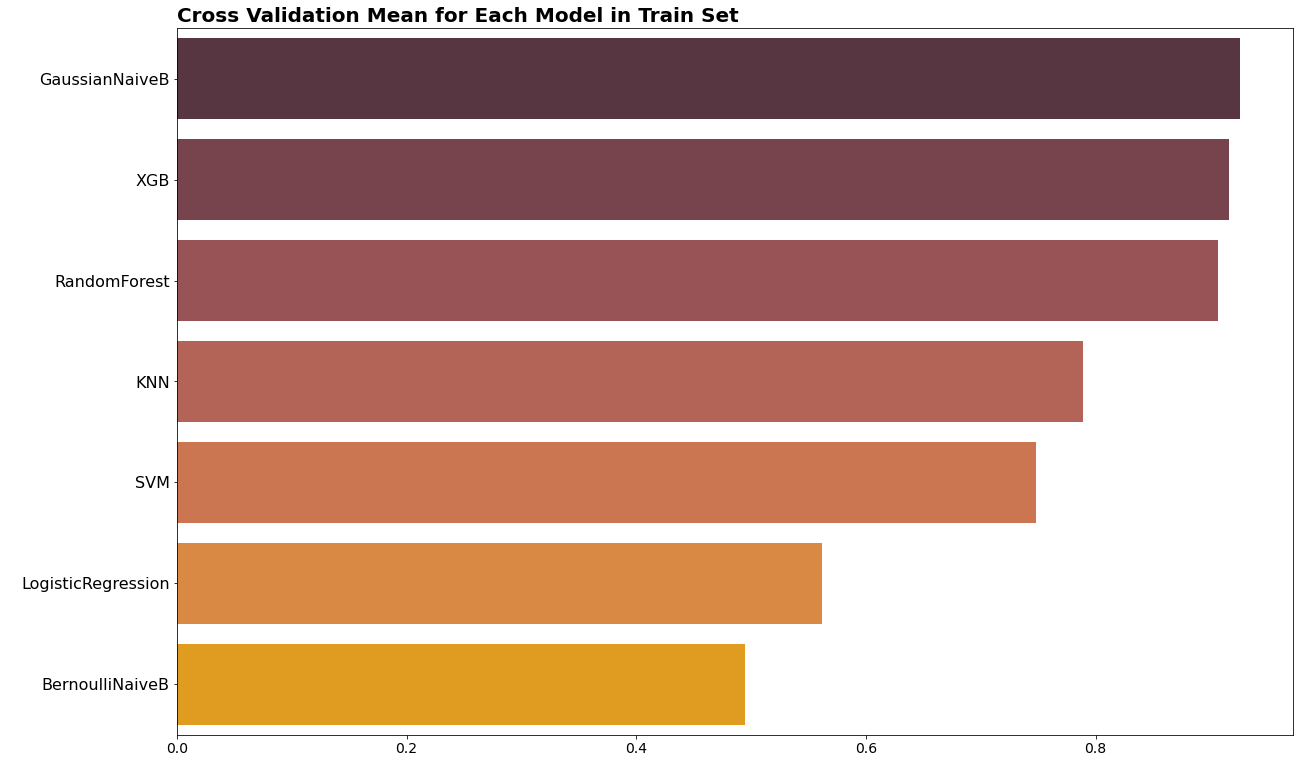

In [23]:
plt.figure(figsize= (20,13))
l = ['#5c3140' , '#803b49' , '#a3474b' , '#c45747' , '#df6d3d' , '#f3872b' , '#ffa600']
sns.barplot(x = models.CrossValidationMean , y = models.Models, palette = l )
plt.xticks(size = 14)
plt.title('Cross Validation Mean for Each Model in Train Set' , fontsize = 20 , weight = 'bold' , loc = 'left')
plt.xlabel(' ')
plt.ylabel(' ')
plt.yticks(size = 16)

### **Testing Top 4 Models with Parameter Tunning [Since the 2 first models are relatively pronated to overfitting (XGB tries to avoid that by an learning rate applied for each step or tree])** ###

In [24]:
RF = RandomForestClassifier()
XGB = XGBClassifier()
Gaussian = GaussianNB()
KNN = KNeighborsClassifier()




RFParameters = [{'n_estimators': [100,150,80,130,50] , 'criterion':['gini' , 'entropy']}]



GaussianParameters = [{'var_smoothing':[1e-9,1e-8,1e-10,1e-11]}]
XGBParameters = [{'learning_rate':[.1,.15,.08,.2],
                 'max_depth':[3,5,8]}]


KNNParameters= [{'n_neighbors': [3,5,7],
                'weights' :['uniform','distance']}]

In [25]:
RF.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [26]:
XGB.get_params().keys()

dict_keys(['base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'n_estimators', 'n_jobs', 'nthread', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'seed', 'silent', 'subsample', 'verbosity'])

In [27]:
Gaussian.get_params().keys()

dict_keys(['priors', 'var_smoothing'])

In [28]:
KNN.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [29]:
yhat = y_test

### **Evolutionary Algorithm** ##

##### **Random Forest**

In [30]:
RFevo = EvolutionaryAlgorithmSearchCV(RF,RFParameters,scoring = 'accuracy',
                                    cv = 20, population_size = 50)

In [31]:
RFevo.fit(x_train,y_train)

In [32]:
RFevo.best_score_

0.9158878504672897

##### **XGBoost Classifier**

In [33]:
XGBevo = EvolutionaryAlgorithmSearchCV(XGB,XGBParameters,cv = 20,
                                       population_size = 50)

In [34]:
XGBevo.fit(x_train,y_train)

In [35]:
XGBevo.best_score_

0.9158878504672897

###### **Gaussian Noise**

In [36]:
Gaussianevo = EvolutionaryAlgorithmSearchCV(Gaussian,GaussianParameters,cv=20,
                                            population_size = 50)
Gaussianevo.fit(x_train,y_train)
Gaussianevo.best_score_

0.9299065420560748

###### **KNN**

In [37]:
KNNevo = EvolutionaryAlgorithmSearchCV(KNN, KNNParameters,cv=20)
KNNevo.fit(x_train,y_train)
KNNevo.best_score_

0.7990654205607477

#### **Selecting Best model and Evaluating in the Entire Dataset (Unbalaced)**

In [38]:
df['Gender'] = le.transform(df['Gender'])
df.drop('User ID' , axis = 1, inplace = True)
X = df.drop('Purchased' , axis = 1)
y = df.Purchased
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [39]:
Evolutionary = [RFevo,XGBevo,Gaussianevo,KNNevo]
names = 'RandomForest' , 'XGB' , 'GaussianNaiveB' , 'KNNModel'
EvolutionaryACC = []

for i in range(len(Evolutionary)):
  model = names[i]
  print(model)
  acc = cross_val_score(Evolutionary[i], X , y , scoring = 'accuracy' , cv = 20)
  mean_acc = np.mean(acc)
  EvolutionaryACC.append(mean_acc)
  print(classification_report(Evolutionary[i].predict(X) , y))
  print('Mean Accuracy in Cross Validation: {}',format(mean_acc))
  print('_______________________________________________________________________')
  

RandomForest
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       228
           1       0.98      0.81      0.89       172

    accuracy                           0.91       400
   macro avg       0.93      0.90      0.91       400
weighted avg       0.92      0.91      0.91       400

Mean Accuracy in Cross Validation: {} 0.8875
_______________________________________________________________________
XGB
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       231
           1       0.97      0.82      0.88       169

    accuracy                           0.91       400
   macro avg       0.92      0.90      0.91       400
weighted avg       0.92      0.91      0.91       400

Mean Accuracy in Cross Validation: {} 0.8975
_______________________________________________________________________
GaussianNaiveB
              precision    recall  f1-score   support

           0       0.84  

In [42]:
post = pd.DataFrame({'models':names , 'MeanAccuracy':EvolutionaryACC})

In [48]:
post = post.sort_values('MeanAccuracy' ,ascending= False)
post

,models,MeanAccuracy
1,XGB,0.8975
0,RandomForest,0.8875
2,GaussianNaiveB,0.8825
3,KNNModel,0.7875


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

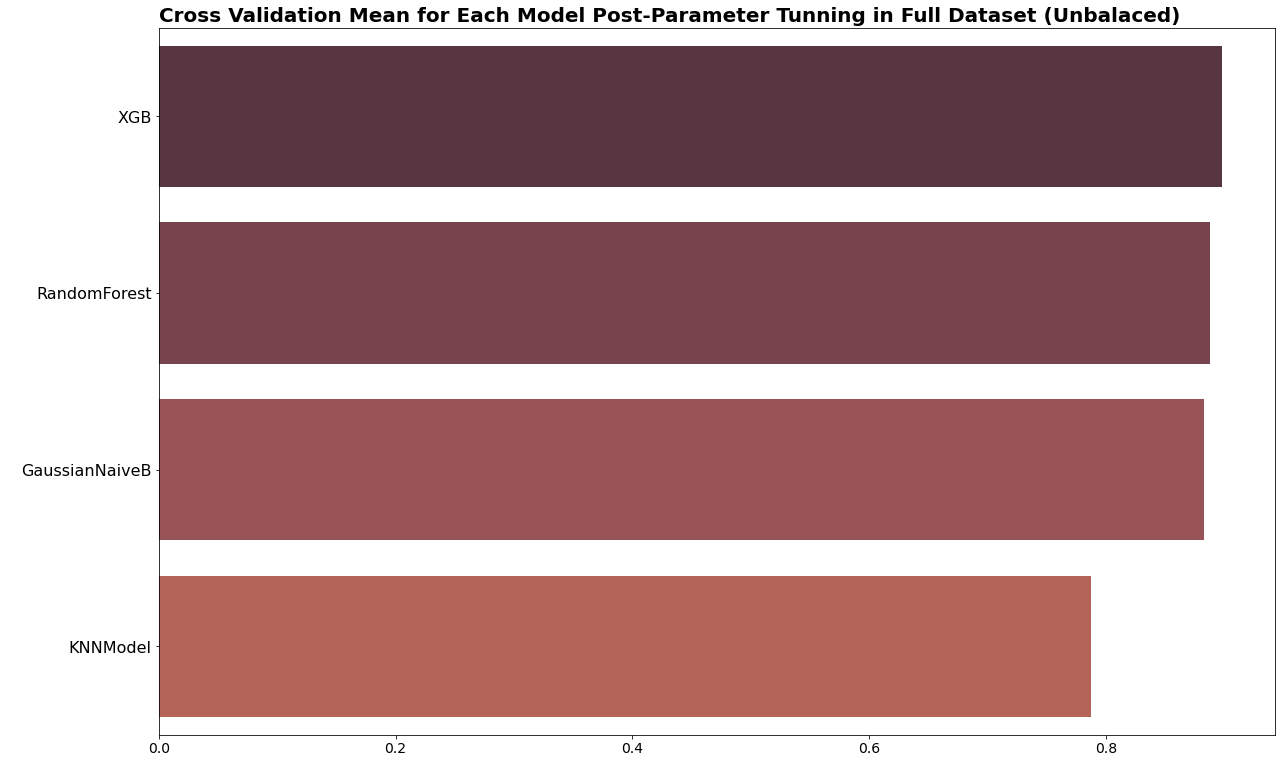

In [50]:
plt.figure(figsize= (20,13))
l = ['#5c3140' , '#803b49' , '#a3474b' , '#c45747' , '#df6d3d' , '#f3872b' , '#ffa600']
sns.barplot(x = post.MeanAccuracy , y = post.models, palette = l )
plt.xticks(size = 14)
plt.title('Cross Validation Mean for Each Model Post-Parameter Tunning in Full Dataset (Unbalaced)' , fontsize = 20 , weight = 'bold' , loc = 'left')
plt.xlabel(' ')
plt.ylabel(' ')
plt.yticks(size = 16)

In [51]:
best_model = XGBevo

In [53]:
XGBevo

EvolutionaryAlgorithmSearchCV(cv=20, error_score='raise',
                              estimator=XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      gamma=0,
                                                      learning_rate=0.1,
                                                      max_delta_step=0,
                                                      max_depth=3,
                                                      min_child_weight=1,
                                                      missing=None,
                                                      n_estimators=100,
                                                      n_jobs=1, nthread=None,
          